# ML flow

In [45]:
pip install --upgrade mlflow

Note: you may need to restart the kernel to use updated packages.


## MLflow tracking: Setup new experiment

In [4]:
import mlflow
import mlflow.sklearn
import mlflow.pyfunc

# Set the MLflow tracking URI to the server where you want to track experiments
mlflow.set_tracking_uri("http://127.0.0.1:5000")

# Start an MLflow experiment
mlflow.set_experiment("Causal_Inference_Model")

<Experiment: artifact_location='mlflow-artifacts:/205875650462900599', creation_time=1714075175337, experiment_id='205875650462900599', last_update_time=1714075175337, lifecycle_stage='active', name='Causal_Inference_Model', tags={}>

# Import Libraries

In [5]:
import pandas as pd
import numpy as np
from causalml.inference.meta import LRSRegressor, XGBTRegressor,BaseRRegressor
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
import shap
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from causalml.inference.meta import BaseXLearner, BaseSLearner, BaseTLearner, BaseRLearner
from causalml.inference.meta.explainer import Explainer
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from causalml.inference.tree import UpliftRandomForestClassifier
from sklearn.pipeline import Pipeline
from flask import Flask, request, jsonify
import mlflow.sklearn

# Import Data

In [6]:
df = pd.read_csv('/Users/qianlou/Documents/GitHub/Customer-Personality-Analysis-2.0/Data/Preprocessed Data/Final Preprocessed Data.csv')

# Causal Inference Pipeline

Pass `sample_weight` as keyword args.
[18:06:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "save_model_format" } are not used.

[18:06:04] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
[18:06:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "save_model_format" } are not used.



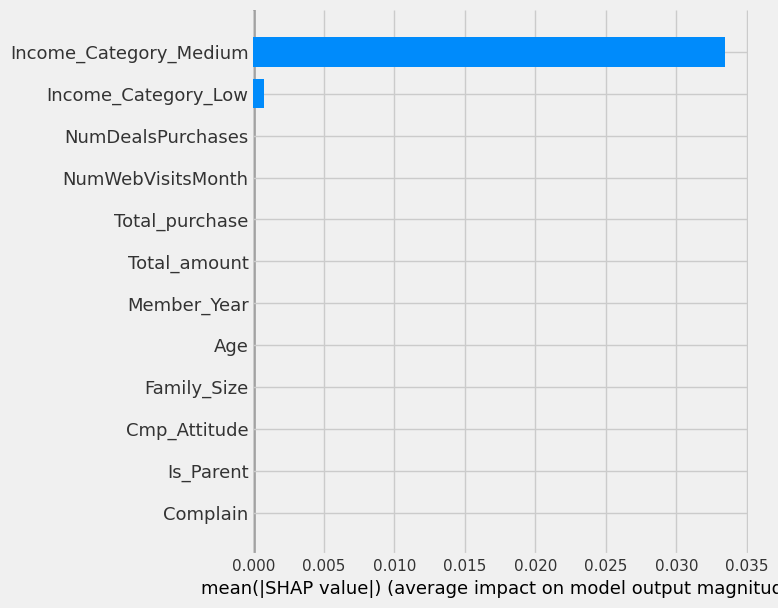

Pass `sample_weight` as keyword args.
[18:06:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "save_model_format" } are not used.

[18:06:08] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
[18:06:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "save_model_format" } are not used.



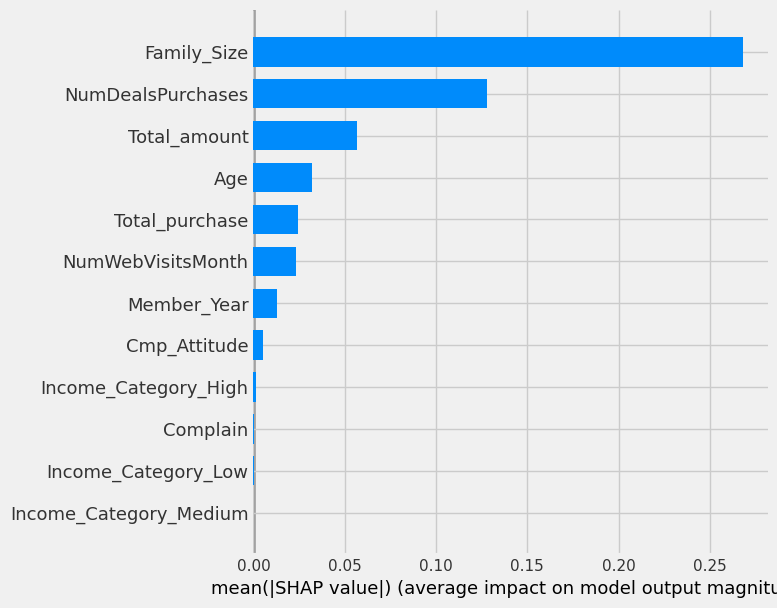

Pass `sample_weight` as keyword args.
[18:06:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "save_model_format" } are not used.

[18:06:13] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
[18:06:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "save_model_format" } are not used.



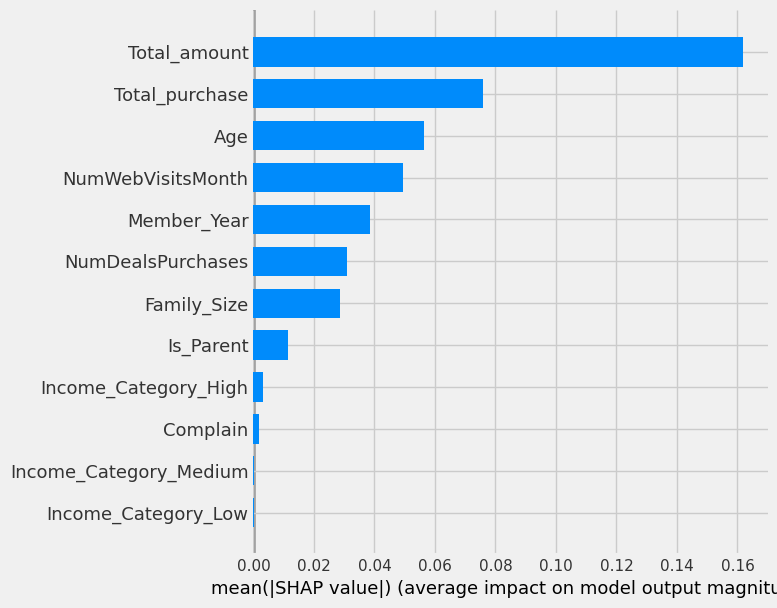

Pass `sample_weight` as keyword args.
[18:06:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "save_model_format" } are not used.

[18:06:17] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
[18:06:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "save_model_format" } are not used.



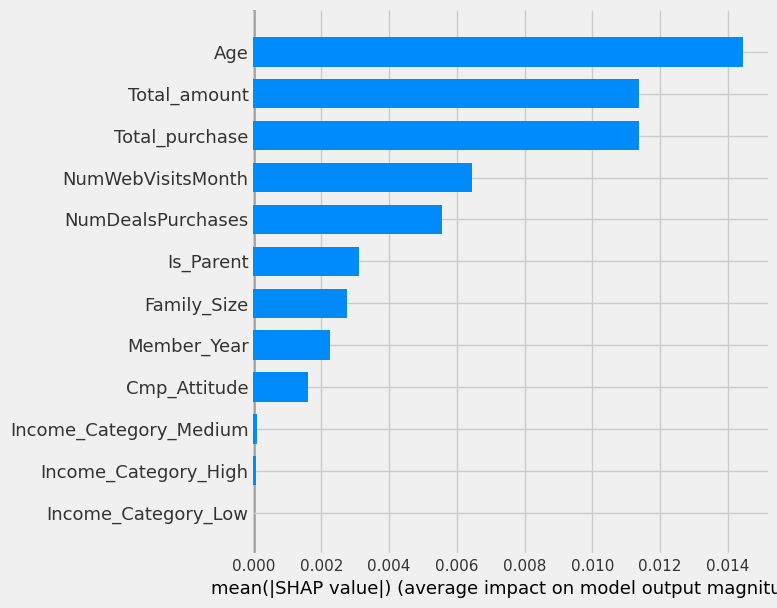

              Treatment    Model Type       ATE       RMSE
0  Income_Category_High  XGBRegressor  0.984333  54.668270
1             Is_Parent  XGBRegressor  0.714969  54.865256
2          Cmp_Attitude  XGBRegressor  0.217046  55.342698
3              Complain  XGBRegressor  0.012355  55.493829


Pass `sample_weight` as keyword args.
[18:06:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "save_model_format" } are not used.

[18:06:21] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


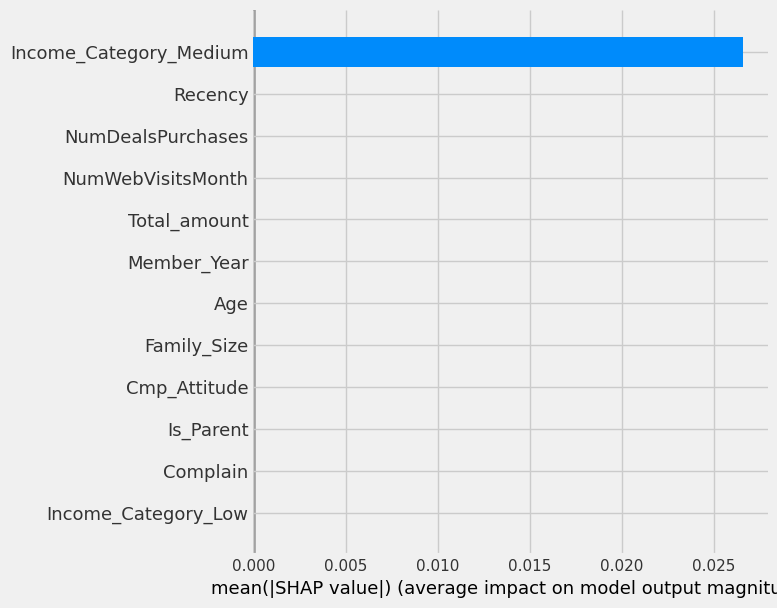

Pass `sample_weight` as keyword args.
[18:06:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "save_model_format" } are not used.

[18:06:25] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
[18:06:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "save_model_format" } are not used.



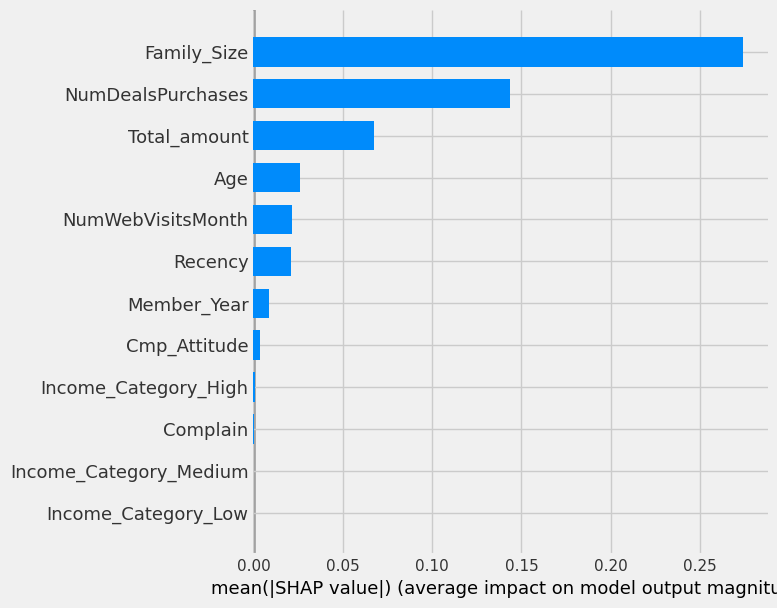

Pass `sample_weight` as keyword args.
[18:06:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "save_model_format" } are not used.

[18:06:29] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


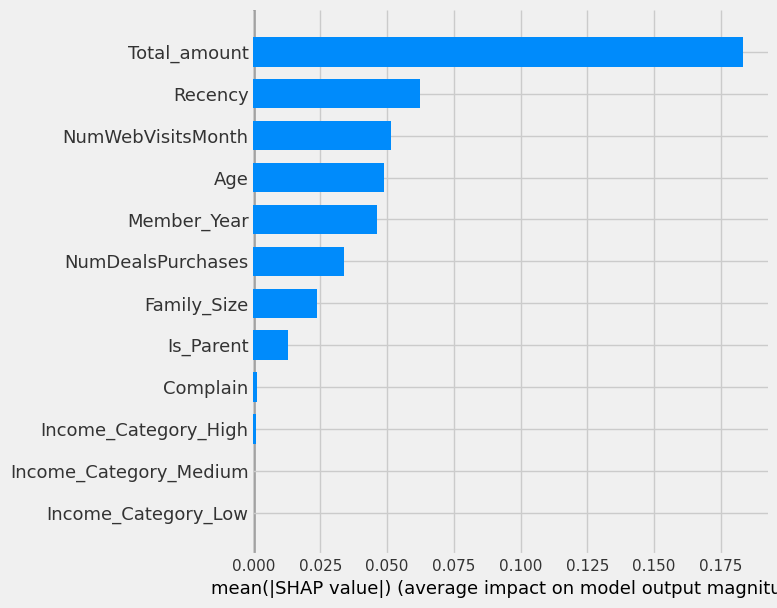

Pass `sample_weight` as keyword args.
[18:06:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "save_model_format" } are not used.

[18:06:33] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
[18:06:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "save_model_format" } are not used.



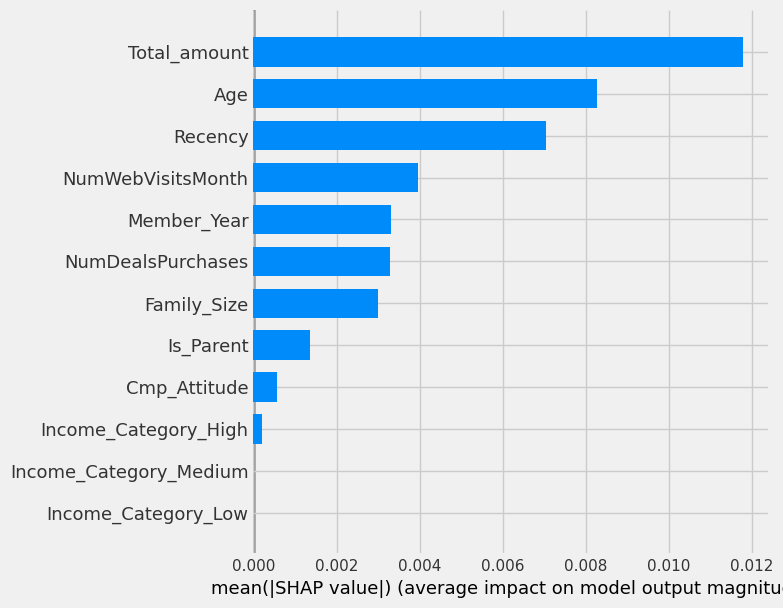

              Treatment    Model Type       ATE       RMSE
0  Income_Category_High  XGBRegressor  0.984334  13.986251
1             Is_Parent  XGBRegressor  0.713814  14.284128
2          Cmp_Attitude  XGBRegressor  0.222287  14.588297
3              Complain  XGBRegressor  0.011634  14.830375


Pass `sample_weight` as keyword args.
[18:06:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "save_model_format" } are not used.

[18:06:37] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


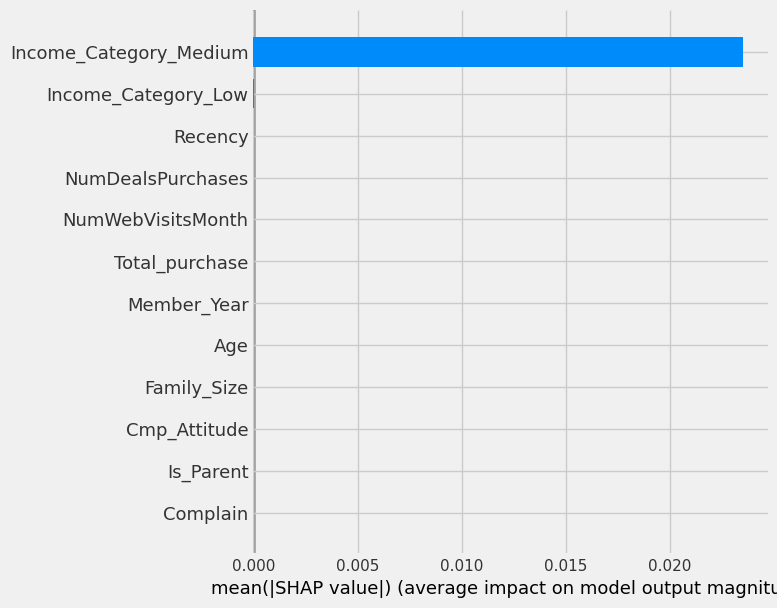

Pass `sample_weight` as keyword args.
[18:06:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "save_model_format" } are not used.

[18:06:43] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
[18:06:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "save_model_format" } are not used.



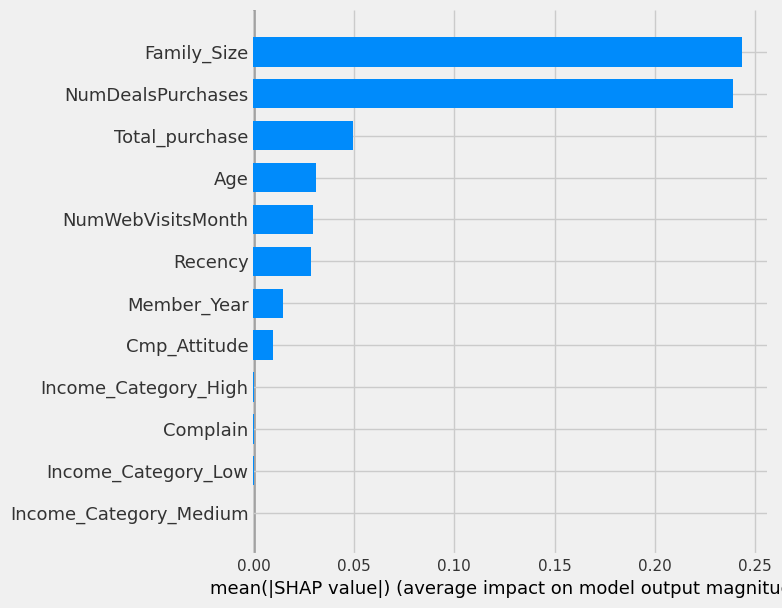

Pass `sample_weight` as keyword args.
[18:06:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "save_model_format" } are not used.

[18:06:48] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
[18:06:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "save_model_format" } are not used.



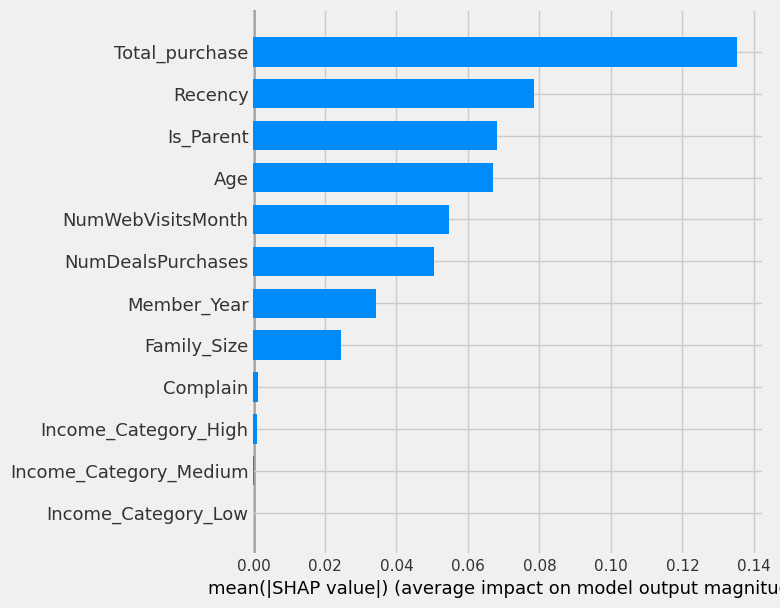

Pass `sample_weight` as keyword args.
[18:06:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "save_model_format" } are not used.

[18:06:56] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
[18:06:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "save_model_format" } are not used.



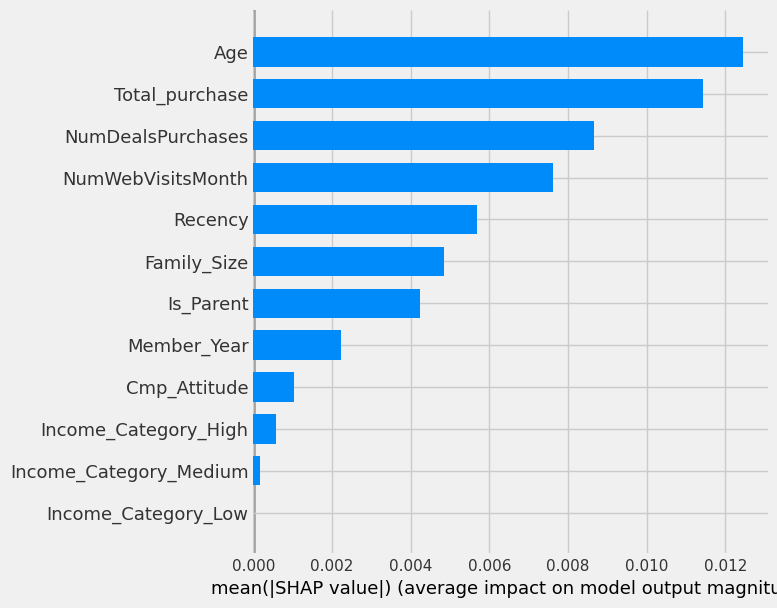

              Treatment     Model Type         ATE        RMSE
0  Income_Category_High  XGBTRegressor  511.023533  144.423810
1             Is_Parent   XGBRegressor    0.712451  857.820614
2          Cmp_Attitude  XGBTRegressor  178.767153  768.100556
3              Complain   XGBRegressor    0.012323  858.196562


In [17]:
def causal_inference_pipeline(df, X_cols, treatments, outcomes):
    for outcome in outcomes:
        with mlflow.start_run(run_name=f"Causal Inference - {outcome}", nested=True):
            mlflow.log_param("outcome", outcome)
            results = []

            for treatment in treatments:
                with mlflow.start_run(run_name=f"Treatment - {treatment}", nested=True):
                    mlflow.log_param("treatment", treatment)
                    covariates = [col for col in X_cols if col != treatment and col != outcome]
                    X = df[covariates]
                    y = df[outcome]
                    t = df[treatment]

                    X_train, X_test, y_train, y_test, t_train, t_test = train_test_split(
                        X, y, t, test_size=0.2, random_state=42)

                    lowest_rmse = float('inf')
                    best_model = None
                    best_ate = None
                    best_shap_values = None

                    for model_type in [XGBRegressor, XGBTRegressor]:
                        try:
                            model = model_type()
                            if model_type == XGBRegressor:
                                model.set_params(**{'save_model_format': 'json'})  # Set model saving format
                            model.fit(X_train, t_train, y_train)
                            if isinstance(model, XGBRegressor):
                                explainer = shap.TreeExplainer(model)
                                shap_values = explainer.shap_values(X_test)

                            ate_mean, ate_std = cross_validate_ate(model, X, t, y)
                            y_pred = model.predict(X_test)
                            rmse = np.sqrt(mean_squared_error(y_test, y_pred))

                            if rmse < lowest_rmse:
                                lowest_rmse = rmse
                                best_model = model
                                best_ate = ate_mean
                                best_shap_values = shap_values
                                mlflow.log_metric("rmse", rmse)
                                mlflow.log_metric("ate", ate_mean)

                        except Exception as e:
                            print(f"Error training model for treatment {treatment}:", e)

                    if best_model:
                        mlflow.sklearn.log_model(best_model, f"model_{treatment}")
                        plt.figure(figsize=(10, 5))
                        shap.summary_plot(best_shap_values, X_test, plot_type="bar")
                        plt.savefig("shap_summary.png")
                        mlflow.log_artifact("shap_summary.png")
                        plt.close()

                    results.append({
                        'Treatment': treatment,
                        'Model Type': best_model.__class__.__name__ if best_model else None,
                        'ATE': best_ate,
                        'RMSE': lowest_rmse
                    })

                    mlflow.end_run()  # End the nested run

            results_df = pd.DataFrame(results)
            print(results_df)
            mlflow.end_run()  # End the parent run

# Cross-validation function for ATE
def cross_validate_ate(estimator, X, treatment, y, cv=5):
    kf = KFold(n_splits=cv, shuffle=True, random_state=42)
    ate_scores = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        treatment_train, treatment_test = treatment.iloc[train_index], treatment.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        estimator.fit(X_train, treatment_train, y_train)
        ate_estimate = np.mean(estimator.predict(X_test))
        ate_scores.append(ate_estimate)
    return np.mean(ate_scores), np.std(ate_scores)

# Define treatments, covariates, and outcomes
treatments = ['Income_Category_High', 'Is_Parent', 'Cmp_Attitude', 'Complain']
covariates_list = ['Income_Category_High', 'Income_Category_Low', 'Income_Category_Medium',
                   'Complain', 'Is_Parent', 'Cmp_Attitude', 'Family_Size', 'Age',
                   'Member_Year', 'Total_amount', 'Total_purchase',
                   'NumWebVisitsMonth', 'NumDealsPurchases', 'Recency']
outcomes = ['Recency', 'Total_purchase', 'Total_amount']


model = causal_inference_pipeline(df, covariates_list, treatments, outcomes)
